In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

input_shape = x_train.shape[1:]
num_classes = 10


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [4]:
optimizers = [
    tf.keras.optimizers.SGD(lr=0.01),
    tf.keras.optimizers.Adam(lr=0.001),
    tf.keras.optimizers.RMSprop(lr=0.001)
]

for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Optimizer: {optimizer.__class__.__name__}, Test accuracy: {test_acc}')


1875/1875 [==============================] - 63s 33ms/step - loss: 0.5760 - accuracy: 0.8293 - val_loss: 0.1565 - val_accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1404 - accuracy: 0.9575 - val_loss: 0.0949 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0971 - accuracy: 0.9703 - val_loss: 0.0791 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0778 - accuracy: 0.9761 - val_loss: 0.0591 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0661 - accuracy: 0.9797 - val_loss: 0.0567 - val_accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0591 - val_accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.0481 - val_accura

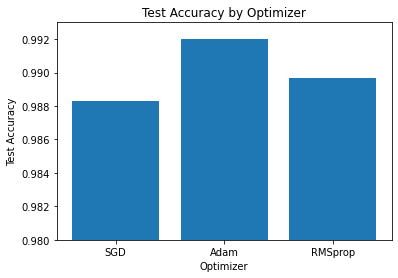

In [8]:
import matplotlib.pyplot as plt
 
optimizers = ['SGD', 'Adam', 'RMSprop']
accuracy = [0.9883, 0.992, 0.9897]
 
plt.bar(optimizers, accuracy)
plt.title('Test Accuracy by Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy')
plt.ylim([0.98, 0.993])
plt.show()
